In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("NYC Jobs Analysis") \
    .getOrCreate()

In [3]:
import sys
sys.path.append("../")

from src.data_processing import *
from src.feature_engineering import *
from src.kpi_analysis import *

In [4]:
df = spark.read.csv("../data/nyc-jobs.csv", header=True, inferSchema=True)

df = handle_null_values(df)
df = clean_salary_columns(df)
df = add_degree_flag(df)

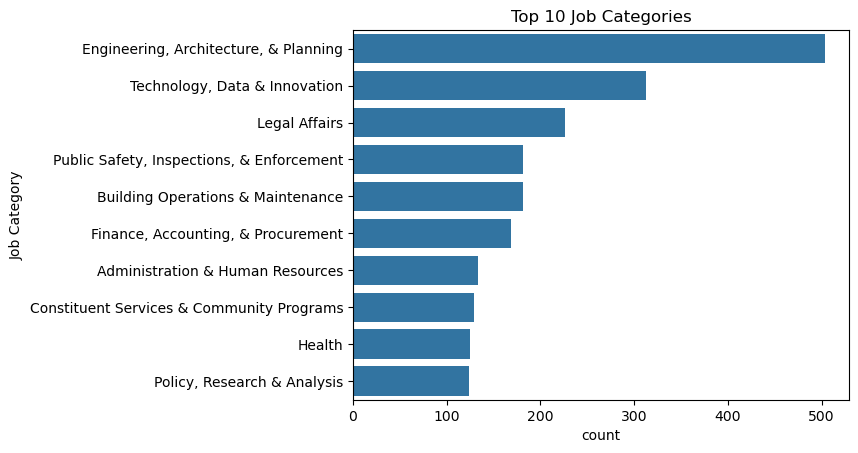

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = top_10_job_categories(df).toPandas()

plt.figure()
sns.barplot(x="count", y="Job Category", data=top10)
plt.title("Top 10 Job Categories")
plt.show()

Salary Distribution Per Category

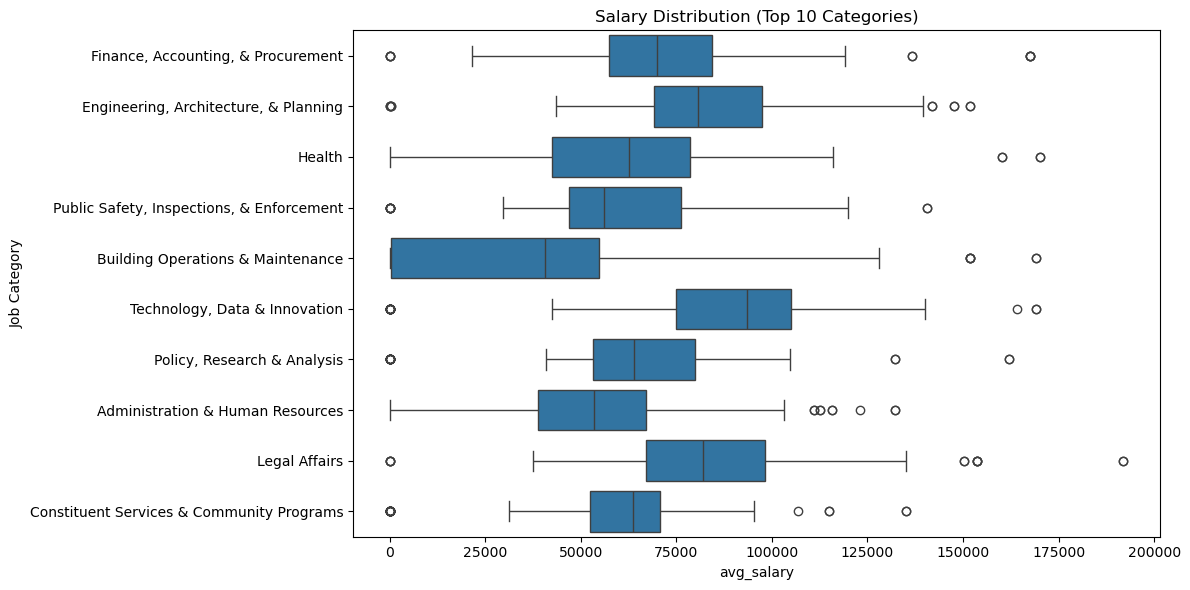

In [15]:
top10_categories = top_10_job_categories(df).select("Job Category")
df_top10 = df.join(top10_categories, on="Job Category", how="inner")
salary_pd = df_top10.select("Job Category", "avg_salary").toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="avg_salary", y="Job Category", data=salary_pd)
plt.title("Salary Distribution (Top 10 Categories)")
plt.tight_layout()
plt.show()

AverageSalaryDistribution

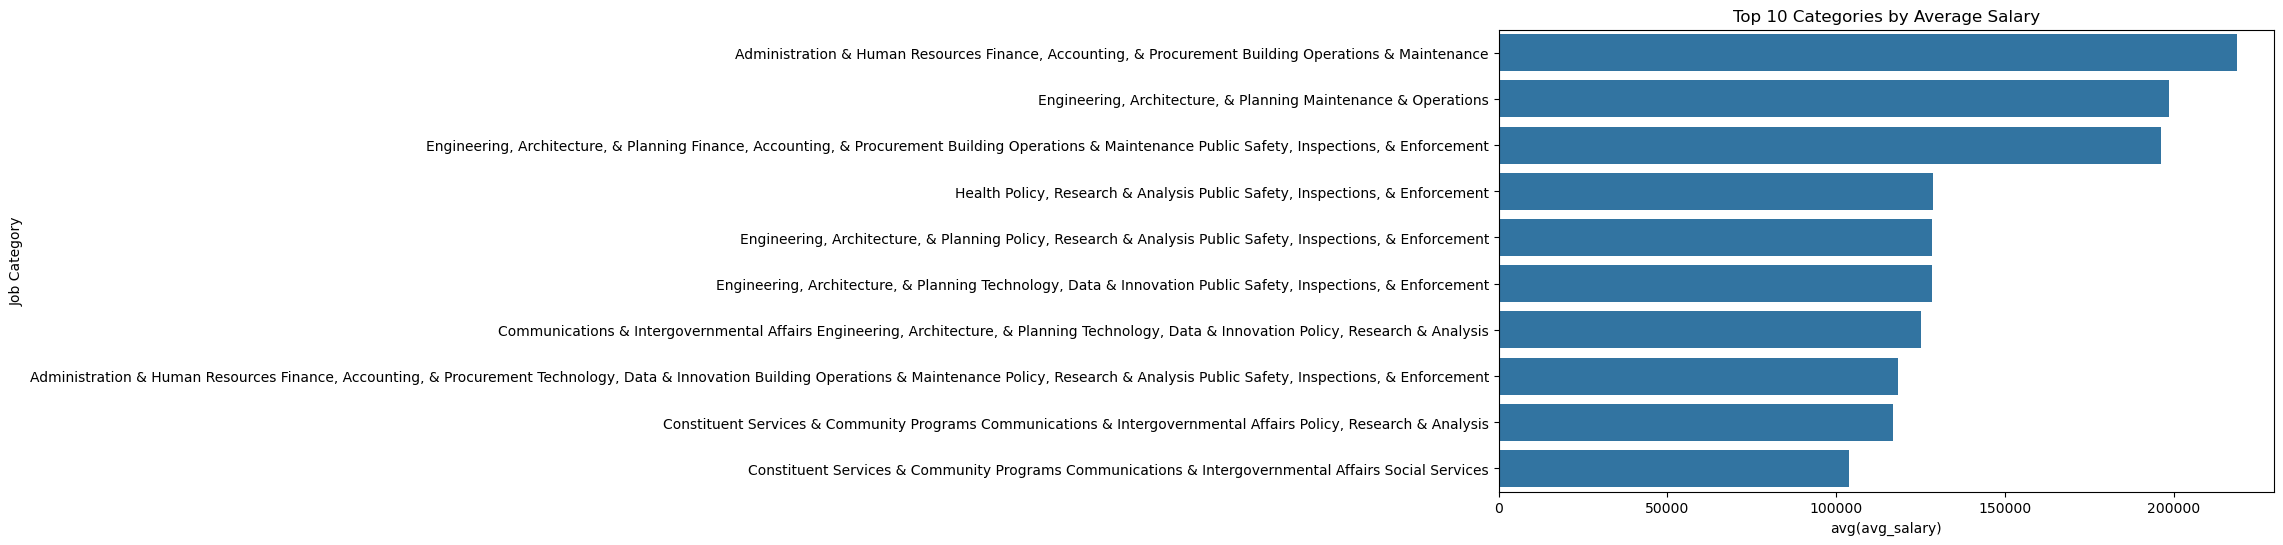

In [16]:
avg_salary_df = df.groupBy("Job Category") \
                  .avg("avg_salary") \
                  .orderBy("avg(avg_salary)", ascending=False) \
                  .limit(10)

avg_salary_pd = avg_salary_df.toPandas()
plt.figure(figsize=(10,6))
sns.barplot(x="avg(avg_salary)", y="Job Category", data=avg_salary_pd)
plt.title("Top 10 Categories by Average Salary")
plt.show()

Degree vs Salary

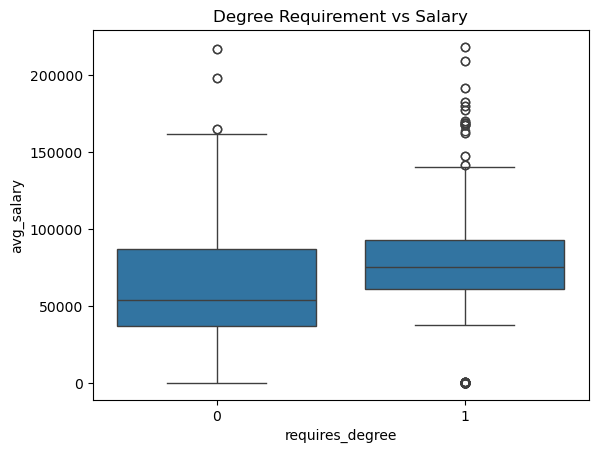

In [10]:
degree_pd = df.select("requires_degree", "avg_salary").toPandas()

plt.figure()
sns.boxplot(x="requires_degree", y="avg_salary", data=degree_pd)
plt.title("Degree Requirement vs Salary")
plt.show()